# 4.10: Coding Etiquette & Excel Reporting

### Task 1: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/lupeguevara/Documents/Instacart Basket Analysis'

In [3]:
path

'/Users/lupeguevara/Documents/Instacart Basket Analysis'

In [4]:
#Import merged version of the data that contains the new customers column.
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer.pkl'))

In [5]:
ords_prods_cust_merge.shape

(32434212, 31)

In [6]:
ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   order_dow               int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  Busiest day             object  
 14  Busy_slow_days          object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  average_price           float64 
 19  spending_flag           object  
 20  median_days             float64 
 21  order_

In [7]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,number_of_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


### Task 2: Consider any security implications that might exist for this new data.

#### Security Implication: This data set contains personally identifiable information (PII) for example: first name and last name of customers. These identifiers are sensitive information that will be flagged to the manager of data security. 

### Task 3: Create a regional segmentation of the data, where the “Region” column based on the “State” column from the customers data set.

- Use regional info from Wiki as reference
- Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [8]:
#Create new column

result = []

for value in ords_prods_cust_merge["state"]:
  if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    result.append('Northeast')
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    result.append('Midwest')
  elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
    result.append('South')
  else: 
    result.append('West')

In [9]:
#Create new column 'region' within the dataframe and set it equal to result

ords_prods_cust_merge['region'] = result

In [10]:
#Check frequency of each region (and compare the sum of them with the total frequency)

ords_prods_cust_merge['region'].value_counts()

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [11]:
#Check the new column is in the dataframe

ords_prods_cust_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,number_of_dependents,family_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South


In [12]:
ords_prods_cust_merge[['user_id', 'spending_flag', 'state', 'region']].head(100)

,user_id,spending_flag,state,region
0,1,Low spender,Alabama,South
1,1,Low spender,Alabama,South
2,1,Low spender,Alabama,South
3,1,Low spender,Alabama,South
4,1,Low spender,Alabama,South
...,...,...,...,...
95,15,Low spender,Indiana,Midwest
96,15,Low spender,Indiana,Midwest
97,15,Low spender,Indiana,Midwest
98,15,Low spender,Indiana,Midwest


In [13]:
#Create a dataframe to group the data by region and spending_flag

df_grouped = ords_prods_cust_merge.groupby(['region', 'spending_flag']).size().unstack()

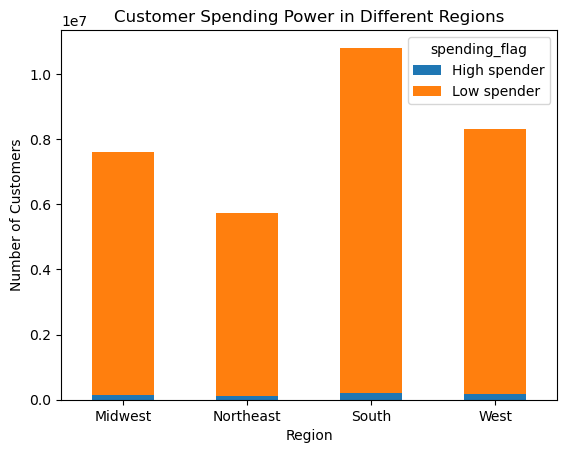

In [14]:
#Plot a bar chart of the difference in spending habits between the different U.S. regions

bar_spender_region = df_grouped.plot(kind = 'bar', stacked = True)
plt.title('Customer Spending Power in Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [15]:
#Export bar chart

bar_spender_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_region.png'))

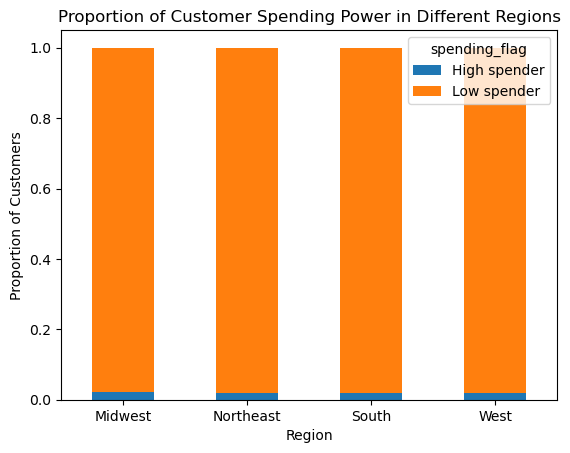

In [16]:
#Analyze the proportions of high and low spender in each region

df_prop_grouped = df_grouped.div(df_grouped.sum(axis = 1), axis = 0)
bar_spender_region_prop = df_prop_grouped.plot(kind = 'bar', stacked = True)
plt.title('Proportion of Customer Spending Power in Different Regions')
plt.xlabel('Region')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.show()

In [17]:
#Export the bar chart
bar_spender_region_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_region_prop.png'))

#### The data visualization illustrates a consistent customer behavior, specifically spending power, across four regions. It reveals that the prevalence of low spenders significantly outweighs that of high spenders nationwide. Consequently, the proportion of high spenders within each region is notably low.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'West'),
  Text(3, 0, 'Northeast')])

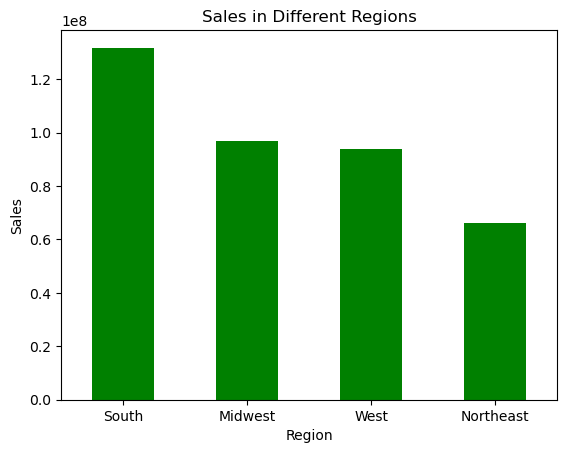

In [18]:
#Plot sales in differnt regions 

bar_sales_region = ords_prods_cust_merge.groupby('region')['prices'].sum().sort_values(ascending=False).plot.bar(title = 'Sales in Different Regions', xlabel = 'Region', ylabel = 'Sales', color = 'green')
plt.xticks(rotation = 0)

In [19]:
#Export the chart
bar_sales_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_region.png'))

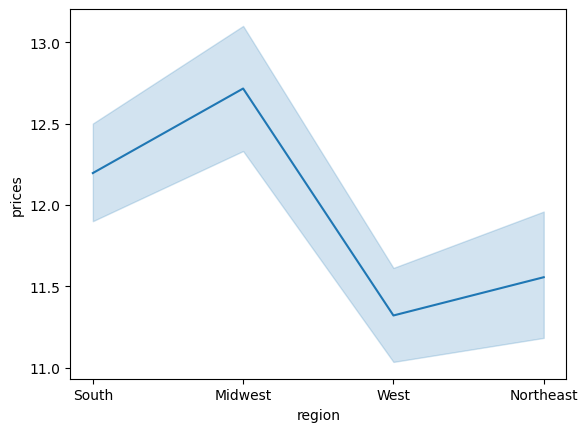

In [20]:
#Create line chart 

line = sns.lineplot(data=ords_prods_cust_merge, x='region', y='prices')

In [21]:
#Export the line chart

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_sales_region.png'))

### Step 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

In [22]:
#Create a new column with max_order

ords_prods_cust_merge['max_order'] = ords_prods_cust_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [23]:
#Create a flag that assigns a “low_activity” label to a user ID based on its corresponding max order value.

ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] < 5, 'low_activity'] = 'True'
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] >= 5, 'low_activity'] = 'False'

In [24]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,number_of_dependents,family_status,income,_merge,region,low_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,3,married,40423,both,South,False
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,3,married,40423,both,South,False
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,3,married,40423,both,South,False
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,3,married,40423,both,South,False
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,3,married,40423,both,South,False


In [25]:
ords_prods_cust_merge['low_activity'].value_counts()

low_activity
False    30992664
True      1441548
Name: count, dtype: int64

In [26]:
#Create a new data set which only contains active customers (orders >= 5)

ords_prods_cust_activity = ords_prods_cust_merge[ords_prods_cust_merge['low_activity'] == 'False']

In [27]:
ords_prods_cust_activity.shape

(30992664, 33)

In [28]:
#Export the new dataset on customers activity

ords_prods_cust_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_active.pkl'))

### Task 5: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### [project brief] Question 1: What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

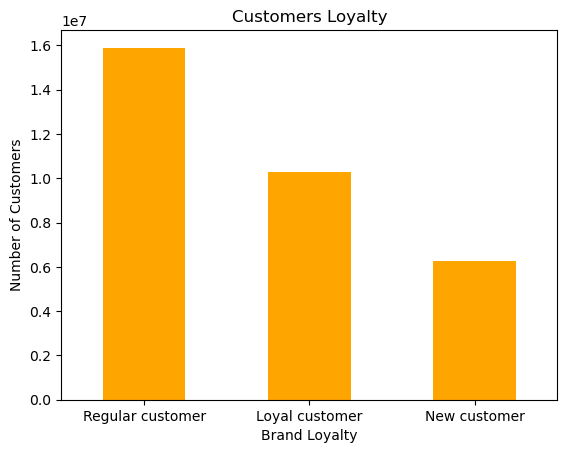

In [29]:
#Create a bar chart showing the number of orders regarding their customer loyalty

bar_orders_loyalty = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Brand Loyalty', ylabel = 'Number of Customers', color = 'orange')
plt.xticks(rotation=0)

In [30]:
#Export the bar chart to record visualization

bar_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

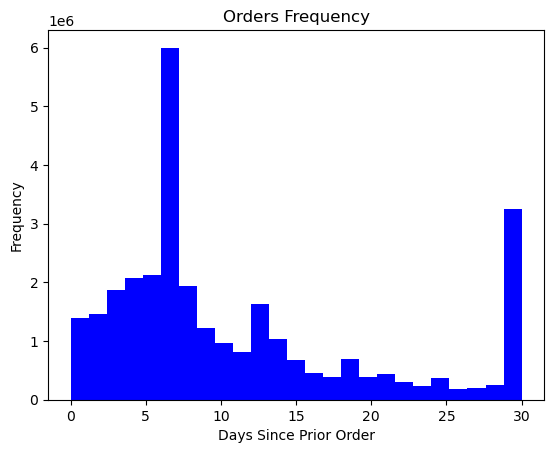

In [31]:
#Create a histogram to check frequency that customers return to Instacart

hist_orders_interval = ords_prods_cust_merge['days_since_prior_order'].plot.hist(bins = 25, title = 'Orders Frequency', xlabel = 'Days Since Prior Order', color = 'blue')

In [32]:
#Export the chart 

hist_orders_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_frequency.png'))

### [project brief] Question 2: Are there differences in ordering habits based on a customer’s loyalty status?

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

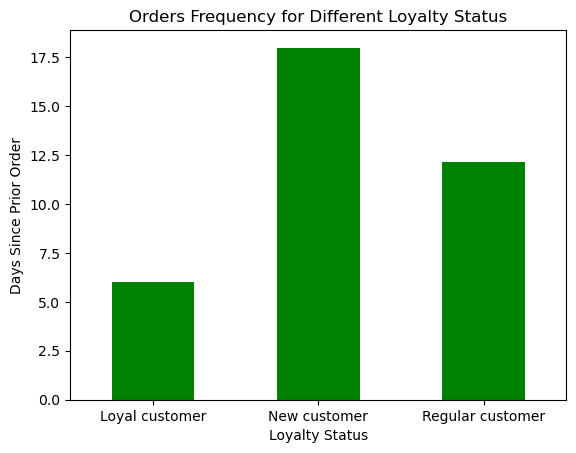

In [33]:
#Create bar chart to demonstate ordering habit - orders interval

bar_orders_interval_loyalty = ords_prods_cust_merge.groupby('loyalty_flag')['days_since_prior_order'].mean().plot.bar(title = 'Orders Frequency for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Days Since Prior Order', color = 'green')
plt.xticks(rotation=0)

In [34]:
#Export the chart

bar_orders_interval_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_frequency_loyalty.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

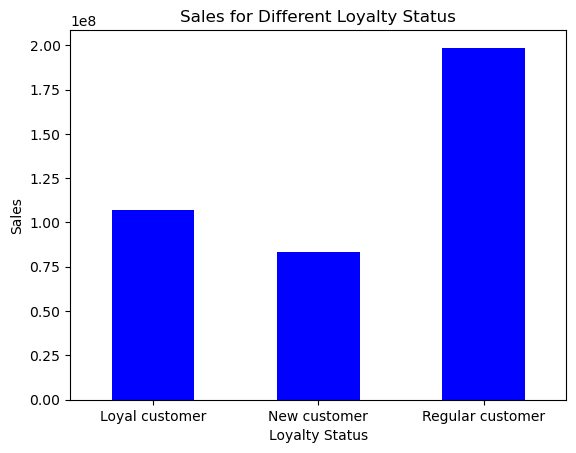

In [35]:
#Create bar chart to demonstrate ordering habit - price of orders

bar_sales_loyalty = ords_prods_cust_merge.groupby('loyalty_flag')['prices'].sum().plot.bar(title = 'Sales for Different Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Sales', color = 'blue')
plt.xticks(rotation=0)

In [36]:
#Export the chart 
bar_sales_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_loyalty.png'))

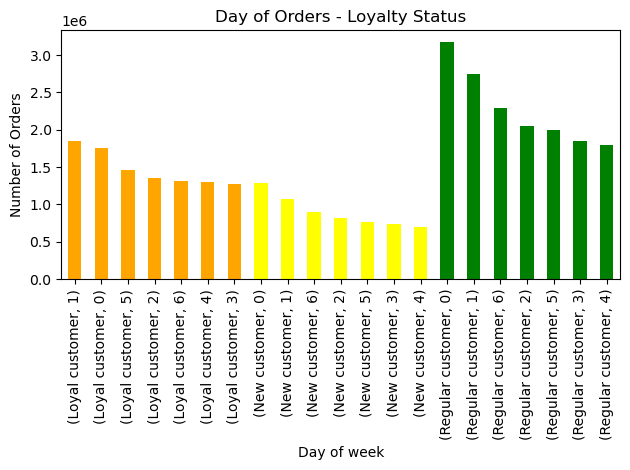

In [37]:
#Create bar chart of ordering habit - which days of week had most orders?

bar_dow_loyalty = ords_prods_cust_merge.groupby('loyalty_flag')['order_dow'].value_counts().plot.bar(title = 'Day of Orders - Loyalty Status', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['orange','orange','orange','orange','orange','orange','orange', 'yellow','yellow','yellow','yellow','yellow','yellow','yellow', 'green', 'green', 'green', 'green', 'green', 'green', 'green'])
plt.tight_layout()

In [38]:
#Export the chart

bar_dow_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_loyalty.png'))

In [39]:
ords_prods_cust_merge.groupby('loyalty_flag')['order_dow'].value_counts()

loyalty_flag      order_dow
Loyal customer    1            1845387
                  0            1756216
                  5            1458107
                  2            1353644
                  6            1319477
                  4            1293242
                  3            1267664
New customer      0            1281580
                  1            1068423
                  6             896507
                  2             815130
                  5             760345
                  3             732075
                  4             695338
Regular customer  0            3171836
                  1            2752020
                  6            2284262
                  2            2048992
                  5            1990997
                  3            1844357
                  4            1798613
Name: count, dtype: int64

#### What time of the day had most orders?

In [40]:
#Create a dataframe of order_hour_of_day of different loyalty customers

df_order_habits_loyalty = ords_prods_cust_merge.groupby('loyalty_flag')['order_hour_of_day'].value_counts()

In [41]:
#Check the top 3 ordering hours of new customer

df_order_habits_loyalty['New customer'].head(3)

order_hour_of_day
15    540901
13    531953
14    531638
Name: count, dtype: int64

In [42]:
# Check the top 3 ordering hours of regular customer

df_order_habits_loyalty['Regular customer'].head(3)

order_hour_of_day
11    1340313
10    1330939
14    1324011
Name: count, dtype: int64

In [43]:
#Check the top 3 ordering hours of loyal customer

df_order_habits_loyalty['Loyal customer'].head(3)

order_hour_of_day
10    938581
9     883711
11    873880
Name: count, dtype: int64

#### Which department has the high numer of orders?

In [44]:
# create a column called 'result' to indicate department name
result = []

for value in ords_prods_cust_merge["department_id"]:
    if value == 1:
        result.append("frozen")
    elif value == 2:
        result.append("other")
    elif value == 3:
        result.append("bakery")
    elif value == 4:
        result.append("produce")
    elif value == 5:
        result.append("alchol")
    elif value == 6:
        result.append("international")
    elif value == 7:
        result.append("beverages")
    elif value == 8:
        result.append("pets")
    elif value == 9:
        result.append("dry goods pasta")
    elif value == 10:
        result.append("bulk")
    elif value == 11:
        result.append("personal care")
    elif value == 12:
        result.append("meat seafood")
    elif value == 13:
        result.append("pantry")
    elif value == 14:
        result.append("breakfast")
    elif value == 15:
        result.append("canned goods")
    elif value == 16:
        result.append("dairy eggs")
    elif value == 17:
        result.append("household")   
    elif value == 18:
        result.append("babies")
    elif value == 19:
        result.append("snacks")
    elif value == 20:
        result.append("deli")
    else:
        result.append("missing")

In [45]:
ords_prods_cust_merge['department_name'] = result

In [46]:
ords_prods_cust_merge['department_name'].value_counts(dropna = False)

department_name
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
international       269253
alchol              153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [47]:
ords_prods_cust_merge['department_id'].value_counts(dropna = False)

department_id
4     9479291
16    5414016
19    2887550
7     2688159
1     2236432
13    1875577
3     1176787
15    1068058
20    1051249
9      866627
17     738666
14     710647
12     708931
11     447691
18     423802
6      269253
5      153743
8       97724
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [48]:
#Create a dataframe to group by 'department_name' and 'loyalty_flag'

df_group_department_loyal = ords_prods_cust_merge.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [49]:
df_group_department_loyal.head()

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
alchol,38726,37716,77301
babies,167108,60118,196576
bakery,381686,224397,570704
beverages,855024,512883,1320252
breakfast,223866,139909,346872


In [50]:
df_group_department_loyal_sort = df_group_department_loyal.sort_values(by = 'Regular customer', ascending = False)

In [51]:
df_group_department_loyal_sort

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
produce,3147376,1736622,4595293
dairy eggs,1835676,974289,2604051
snacks,943150,534251,1410149
beverages,855024,512883,1320252
frozen,609954,485655,1140823
pantry,560452,392306,922819
bakery,381686,224397,570704
canned goods,294594,236180,537284
deli,324046,205750,521453


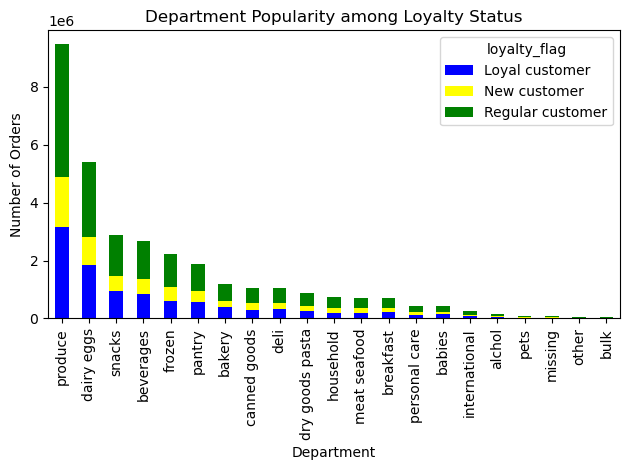

In [52]:
#Plot the data using a bar chart

colors = ['blue', 'yellow', 'green']
bar_dep_loyalty = df_group_department_loyal_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [53]:
#Export the chart

bar_dep_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loyalty.png'))

In [54]:
df_order_habits_loyalty = ords_prods_cust_merge.groupby('loyalty_flag')['department_name'].value_counts()

In [55]:
#Check top 3 sold departments of each loyalty status

df_order_habits_loyalty['New customer'].head(3)

department_name
produce       1736622
dairy eggs     974289
snacks         534251
Name: count, dtype: int64

In [56]:
df_order_habits_loyalty['Regular customer'].head(3)

department_name
produce       4595293
dairy eggs    2604051
snacks        1410149
Name: count, dtype: int64

In [57]:
df_order_habits_loyalty['Loyal customer'].head(3)

department_name
produce       3147376
dairy eggs    1835676
snacks         943150
Name: count, dtype: int64

### [project brief] Question 3: Are there differences in ordering habits based on a customer’s region?

In [58]:
#Show data of ordering habit - orders interval

ords_prods_cust_merge.groupby('region')['days_since_prior_order'].mean()

region
Midwest      11.181993
Northeast    11.076055
South        11.108240
West         11.047007
Name: days_since_prior_order, dtype: float64

In [59]:
#Show data of ordering habit - price of orders

ords_prods_cust_merge.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.715745  1.0  99999.0
Northeast  11.556398  1.0  99999.0
South      12.196270  1.0  99999.0
West       11.321374  1.0  99999.0

In [60]:
#Show ordering habit - which days of week had most orders?

ords_prods_cust_merge.groupby('region')['order_dow'].value_counts()

region     order_dow
Midwest    0            1461356
           1            1322079
           6            1058902
           2             992673
           5             984001
           3             895896
           4             888903
Northeast  0            1098361
           1            1000935
           6             787995
           5             747209
           2             746892
           3             679977
           4             666978
South      0            2054551
           1            1893905
           6            1498091
           2            1405940
           5            1401009
           3            1288493
           4            1259621
West       0            1595364
           1            1448911
           6            1155258
           5            1077230
           2            1072261
           3             979730
           4             971691
Name: count, dtype: int64

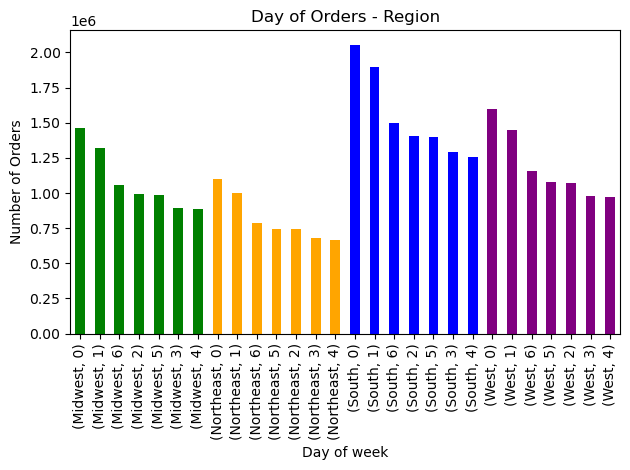

In [61]:
#Create bar graph orders by region

bar_dow_region = ords_prods_cust_merge.groupby('region')['order_dow'].value_counts().plot.bar(title = 'Day of Orders - Region', xlabel = 'Day of week', ylabel = 'Number of Orders', color = ['green','green','green','green','green','green','green', 'orange','orange','orange','orange','orange','orange','orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple'])
plt.tight_layout()

In [62]:
#Export the chart outside of Jupyter in the form of image file

bar_dow_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow_region.png'))

#### What time of the day had most orders?

In [63]:
#Create a dataframe of order_hour_of_day of different regions

df_order_habits_loyalty = ords_prods_cust_merge.groupby('region')['order_hour_of_day'].value_counts()

In [64]:
#Check the top 3 ordering hours of Midwest

df_order_habits_loyalty['Midwest'].head(3)

order_hour_of_day
10    647210
11    642398
15    628670
Name: count, dtype: int64

In [65]:
#Check the top 3 ordering hours of Northeast

df_order_habits_loyalty['Northeast'].head(3)

order_hour_of_day
10    485320
11    483329
14    475816
Name: count, dtype: int64

In [66]:
#Check the top 3 ordering hours of South

df_order_habits_loyalty['South'].head(3)

order_hour_of_day
10    924203
11    910154
14    893998
Name: count, dtype: int64

In [67]:
#Check the top 3 ordering hours of West

df_order_habits_loyalty['West'].head(3)

order_hour_of_day
10    707657
11    702704
14    696113
Name: count, dtype: int64

#### Which department has the high numer of orders?

In [68]:
#Create a dataframe to group the data by 'department_name' and 'region'

df_group_department_region = ords_prods_cust_merge.groupby(['department_name', 'region']).size().unstack()

In [69]:
df_group_department_region_sort = df_group_department_region.sort_values(by = 'South', ascending = False)

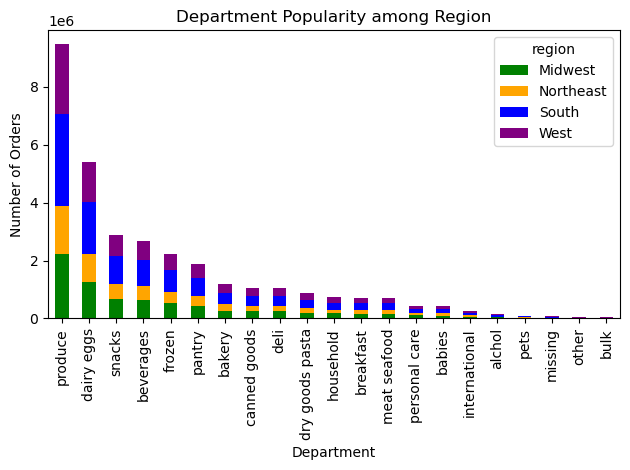

In [70]:
#Plot the data using a bar chart

colors = ['green', 'orange', 'blue', 'purple']
bar_dep_region = df_group_department_region_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [71]:
#Export the chart 

bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_region.png'))

### [project brief] Question 4: Is there a connection between age and family status in terms of ordering habits?

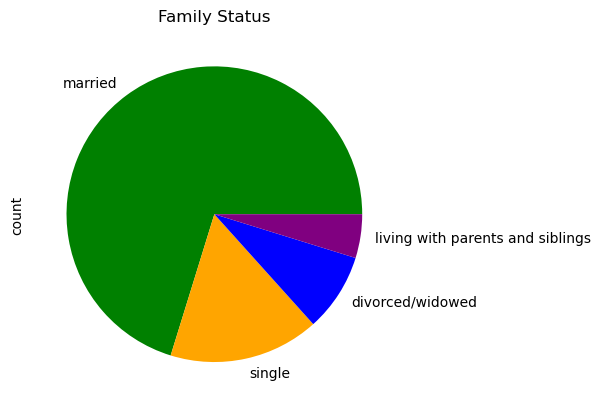

In [72]:
#Check the family status frequency

pie_fam_status = ords_prods_cust_merge['family_status'].value_counts().plot.pie(title = 'Family Status', colors = ['green', 'orange', 'blue', 'purple'])

In [73]:
#Export the chart

pie_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_fam_status.png'))

In [74]:
#Check the age stats for different family status

ords_prods_cust_merge.groupby('family_status').agg({'age': ['mean', 'min', 'max']})

age        
                                       mean min max
family_status                                      
divorced/widowed                  70.513459  60  81
living with parents and siblings  19.503663  18  21
married                           51.486328  22  81
single                            38.598412  18  59

#### Analysis of customer family status reveals that a significant majority (70%) of our customer base is married. Recommend to delve deeper into the characteristics and preferences within this married segment for a more comprehensive understanding.

In [75]:
#Divide the customers into 3 age groups

age_bins = [18, 40, 60, float('inf')] 
age_labels = ['Young', 'Middle', 'Old']

In [76]:
ords_prods_cust_merge['age_flag'] = np.select(
    [(ords_prods_cust_merge['age'] >= 18) & (ords_prods_cust_merge['age'] < 40), (ords_prods_cust_merge['age'] >= 40) & (ords_prods_cust_merge['age'] < 60), ords_prods_cust_merge['age'] >= 60],
    age_labels,
    default=np.nan
)

In [77]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,number_of_dependents,family_status,income,_merge,region,low_activity,department_name,age_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,3,married,40423,both,South,False,beverages,Young
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,False,beverages,Young
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,False,beverages,Young
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,False,beverages,Young
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,3,married,40423,both,South,False,beverages,Young


In [78]:
#Define ordering habit age groups

ords_prods_cust_merge.groupby('age_flag')['order_number'].sum()

age_flag
Middle    174545873
Old       189584203
Young     191854753
Name: order_number, dtype: int64

In [79]:
ords_prods_cust_merge.groupby('age_flag')['prices'].sum()

age_flag
Middle    123472818.8
Old       130317343.1
Young     134808800.1
Name: prices, dtype: float64

In [80]:
#Family status and age groups
#Create a dataframe to group the data by 'family_status' and 'age_flag'

df_group_family_age = ords_prods_cust_merge.groupby(['family_status', 'age_flag']).size().unstack()

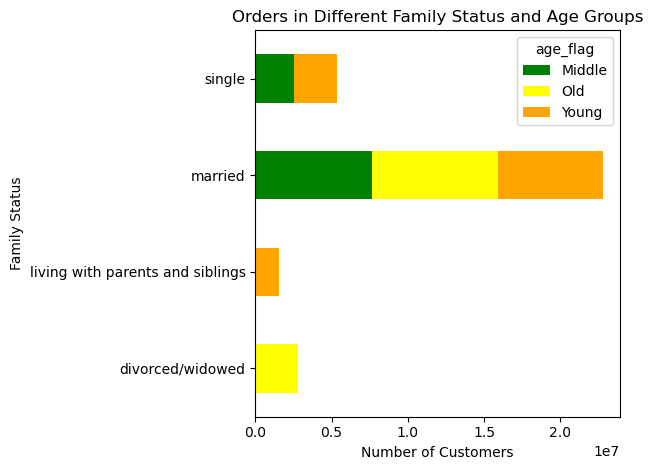

In [81]:
#Plot the data using a bar chart

colors = ['green', 'yellow', 'orange']
bar_fam_age = df_group_family_age.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Orders in Different Family Status and Age Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()

In [82]:
#Export the chart to image file

bar_fam_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_age.png'))

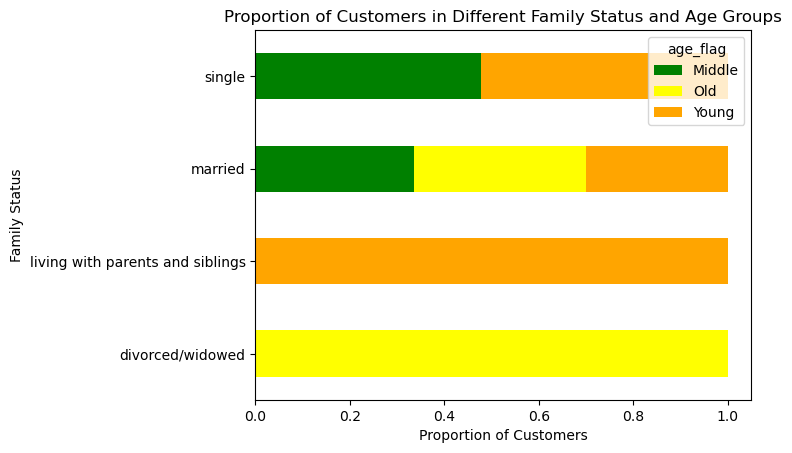

In [83]:
#Analyze the proportions 

df_prop_group_family_age = df_group_family_age.div(df_group_family_age.sum(axis = 1), axis = 0)
bar_fam_age_prop = df_prop_group_family_age.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Proportion of Customers in Different Family Status and Age Groups')
plt.xlabel('Proportion of Customers')
plt.ylabel('Family Status')

plt.show()

In [84]:
#Export the chart to image file

bar_fam_age_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_age_prop.png'))

In [85]:
#Create a dataframe by 'age_flag' and 'loyalty_flag'

df_group_loyal_age = ords_prods_cust_merge.groupby(['age_flag', 'loyalty_flag']).size().unstack()

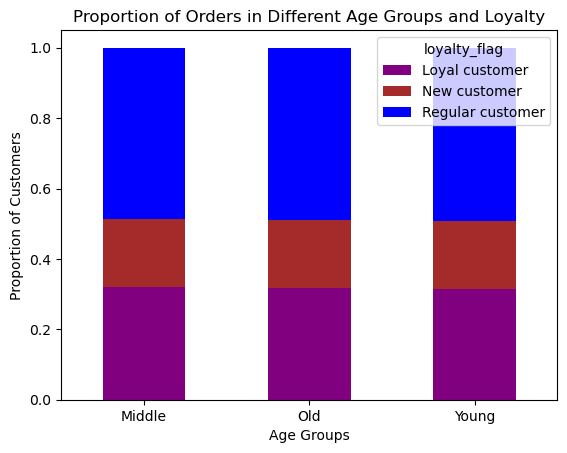

In [86]:
#Analyze the proportions in a bar chart

colors = ['purple', 'brown', 'blue']
df_prop_group_loyal_age = df_group_loyal_age.div(df_group_loyal_age.sum(axis = 1), axis = 0)
bar_age_loyalty_prop = df_prop_group_loyal_age.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Proportion of Orders in Different Age Groups and Loyalty')
plt.xlabel('Age Groups')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.show()

In [87]:
#Export the chart to image file

bar_age_loyalty_prop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_loyalty_prop.png'))

### What different classifications does the demographic information suggest? What differences can you find in  ordering habits of different customer profiles? 

#### Income demographics 

In [88]:
#Create a flag indicating different groups of income

ords_prods_cust_merge['income'].describe()

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

In [89]:
#Create a new column with avg_income

ords_prods_cust_merge['avg_income'] = ords_prods_cust_merge.groupby(['user_id'])['income'].transform('mean')

In [90]:
#Create the flag based on the criteria

ords_prods_cust_merge.loc[ords_prods_cust_merge['avg_income'] > 128000, 'income_flag'] = 'High income'

In [91]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['avg_income'] <= 128000) & (ords_prods_cust_merge['avg_income'] > 67000), 'income_flag'] = 'Middle income'

In [92]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['avg_income'] <= 67000, 'income_flag'] = 'Low income'

In [93]:
#Check results

ords_prods_cust_merge['income_flag'].value_counts(dropna = False)

income_flag
Middle income    16236394
Low income        8108594
High income       8089224
Name: count, dtype: int64

In [94]:
ords_prods_cust_merge.groupby('income_flag')['prices'].mean()

income_flag
High income      22.069102
Low income        7.296539
Middle income     9.294698
Name: prices, dtype: float64

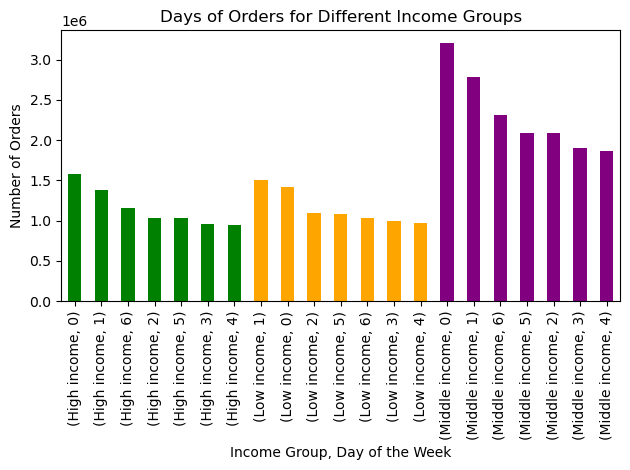

In [95]:
#Create bar chart

bar_orders_income = ords_prods_cust_merge.groupby('income_flag')['order_dow'].value_counts().plot.bar(title = 'Days of Orders for Different Income Groups', xlabel = 'Income Group, Day of the Week', ylabel = 'Number of Orders', color = ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange','orange','orange','orange','orange','orange','orange', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple'])
plt.tight_layout()

In [96]:
#Export the chart to image file

bar_orders_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_income.png'))

#### Number of Dependants Demographics

In [97]:
#Create a flag to indicate if customers have dependants or not

ords_prods_cust_merge['avg_dependant'] = ords_prods_cust_merge.groupby(['user_id'])['number_of_dependents'].transform('mean')

In [98]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'

In [99]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['avg_dependant'] <= 0, 'depend_flag'] = 'Without Dependants'

In [100]:
ords_prods_cust_merge['depend_flag'].value_counts(dropna = False)

depend_flag
With Dependants       24329015
Without Dependants     8105197
Name: count, dtype: int64

#### Customer Profile Demographics

In [101]:
#Create a customer profile variable by age, income and dependants 

ords_prods_cust_merge['customer_profile'] = ords_prods_cust_merge['age_flag'] + '_' + ords_prods_cust_merge['income_flag'] + '_' + ords_prods_cust_merge['depend_flag'] 

In [102]:
#Create a customer profile by sales

customer_profile_prices_sum = ords_prods_cust_merge.groupby('customer_profile')['prices'].sum()

In [103]:
customer_profile_prices_sum_sorted = customer_profile_prices_sum.sort_values(ascending=False)

In [104]:
gradient_colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(customer_profile_prices_sum_sorted)))

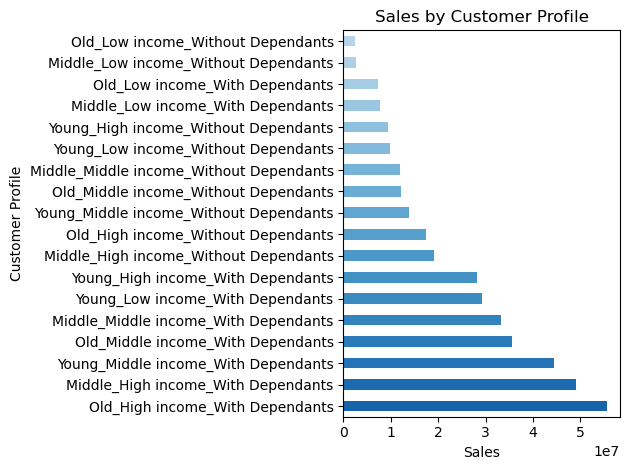

In [105]:
#Create a bar chart to show custome profile

bar_customer_profile_sales = customer_profile_prices_sum_sorted.plot.barh(title = 'Sales by Customer Profile', xlabel = 'Sales', ylabel = 'Customer Profile', color = gradient_colors)
plt.tight_layout()

In [106]:
# Export the chart to image file
bar_customer_profile_sales.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_sales.png'))

In [107]:
#Create customer profile by days_since_prior_order
customer_profile_interval_mean = ords_prods_cust_merge.groupby('customer_profile')['days_since_prior_order'].mean()

In [108]:
customer_profile_interval_mean_sorted = customer_profile_interval_mean.sort_values(ascending=True)

In [109]:
gradient_colors = plt.cm.Oranges(np.linspace(0.3, 0.8, len(customer_profile_interval_mean_sorted)))

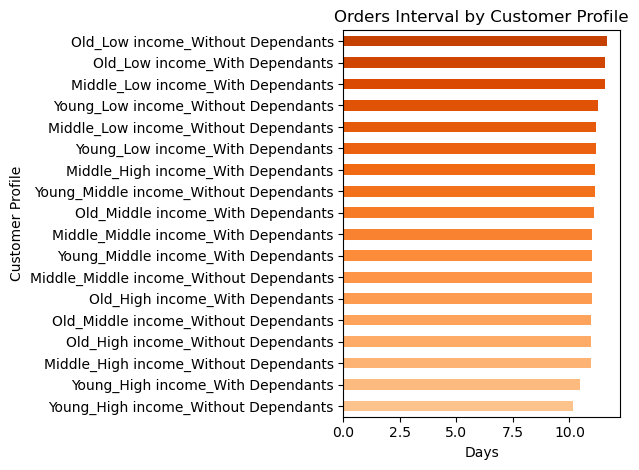

In [110]:
bar_customer_profile_orders_interval = customer_profile_interval_mean_sorted.plot.barh(title = 'Orders Interval by Customer Profile', xlabel = 'Days', ylabel = 'Customer Profile', color = gradient_colors)
plt.tight_layout()

In [111]:
#Export the chart to image file

bar_customer_profile_orders_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_orders_interval.png'))

In [112]:
#Create flags for customers using conditions

condition1 = ords_prods_cust_merge['customer_profile'] == 'Young_High income_With Dependants'
condition2 = ords_prods_cust_merge['customer_profile'] == 'Middle_High income_With Dependants'
condition3 = ords_prods_cust_merge['customer_profile'] == 'Old_High income_With Dependants'
condition4 = ords_prods_cust_merge['customer_profile'] == 'Young_Middle income_With Dependants'
condition5 = ords_prods_cust_merge['customer_profile'] == 'Middle_Middle income_With Dependants'
condition6 = ords_prods_cust_merge['customer_profile'] == 'Old_Middle income_With Dependants'

In [113]:
#Create a dataframe including these customer_profile flags

df_customer_profile_selected = ords_prods_cust_merge[condition1 | condition2 | condition3 |condition4 | condition5 | condition6]

In [114]:
#Check the frequency of departments for these selected groups

df_grouped_pop_dep = df_customer_profile_selected.groupby(['department_name', 'customer_profile']).size().unstack()

In [115]:
df_grouped_pop_dep_sort = df_grouped_pop_dep.sort_values(by = 'Old_High income_With Dependants', ascending = False)

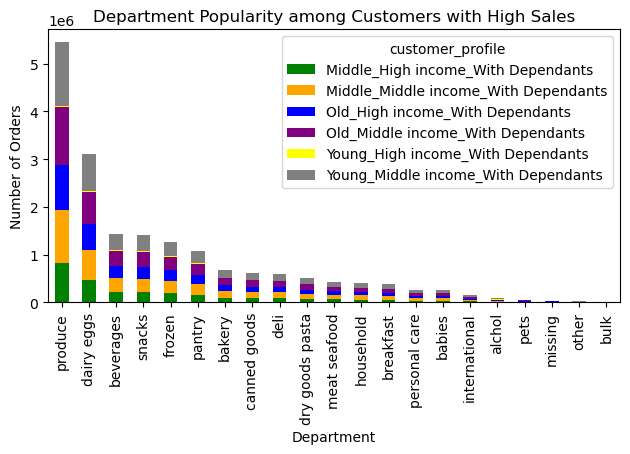

In [116]:
colors = ['green', 'orange', 'blue', 'purple', 'yellow', 'grey']
bar_customer_profile_pop_dep = df_grouped_pop_dep_sort.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department Popularity among Customers with High Sales')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [117]:
#Export the chart to image file

bar_customer_profile_pop_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_pop_dep.png'))

### [project brief] Question 5: Are there particular times of the day when people spend the most money?

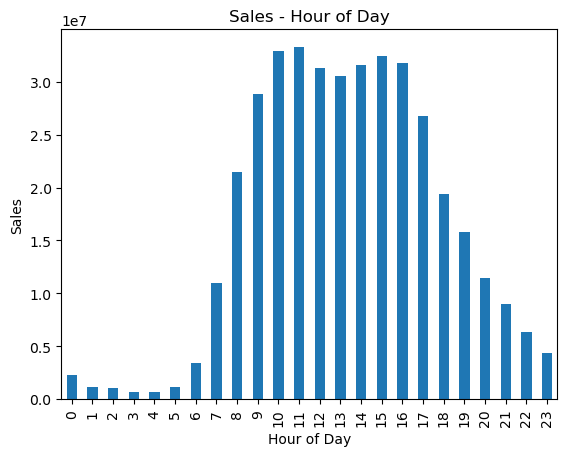

In [118]:
bar_sales_hod = ords_prods_cust_merge.groupby('order_hour_of_day')['prices'].sum().plot.bar(title = 'Sales - Hour of Day', xlabel = 'Hour of Day', ylabel = 'Sales')

In [119]:
#Export the chart to image file

bar_sales_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_hod.png'))

### [project brief] Question 6: What are the differences in price range within numbers of order?

In [120]:
#Define a function of price range

ords_prods_cust_merge.loc[ords_prods_cust_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'
ords_prods_cust_merge.loc[(ords_prods_cust_merge['prices'] <= 15) & (ords_prods_cust_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 
ords_prods_cust_merge.loc[ords_prods_cust_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [121]:
ords_prods_cust_merge['price_range_loc'].value_counts()

price_range_loc
Mid-range product     21890146
Low-range product     10126384
High-range product      417682
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Mid-range product'),
  Text(1, 0, 'Low-range product'),
  Text(2, 0, 'High-range product')])

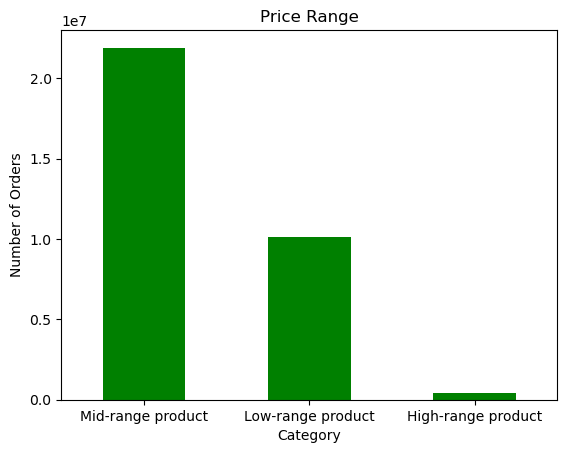

In [122]:
bar_price_range = ords_prods_cust_merge['price_range_loc'].value_counts(dropna = False).plot.bar(title = 'Price Range', xlabel = 'Category', ylabel = 'Number of Orders', color = 'green')
plt.xticks(rotation=0)

### [project brief] Question 7: What are the differences in popularity within departments

In [123]:
ords_prods_cust_merge['department_name'].value_counts()

department_name
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
international       269253
alchol              153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

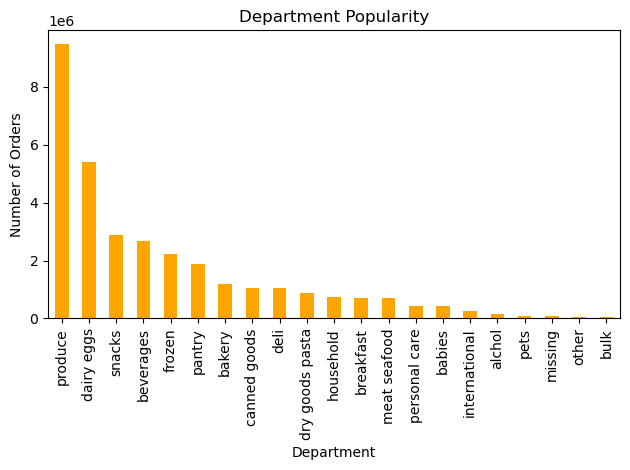

In [124]:
bar_depart_pop = ords_prods_cust_merge['department_name'].value_counts(dropna = False).plot.bar(title = 'Department Popularity', xlabel = 'Department', ylabel = 'Number of Orders', color = 'orange')
plt.tight_layout()

In [125]:
#Export the chart to image file

bar_depart_pop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depart_pop.png'))

In [126]:
#Export the final file to pickle

ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust_all.pkl'))